# Forecast Electric power consumption - Using AR Model
## Table of Content
<ul>
    <li><a href="#ar1">Modeling with AR Befor Augmenting</a></li>
    <li><a href="#ar2">Modeling with AR After Augmenting</a></li>
</ul>

In [1]:
import pandas as pd
import math
import numpy as np

# ---------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
plt.rcParams['figure.figsize']=(17,5)

# ---------------------------------------
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

# ---------------------------------------
from prophet import Prophet
import holidays
from sklearn.metrics import mean_squared_error, mean_absolute_error

#----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
    
#----------------------------------------
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

In [5]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    acc = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print("Accuracy : ", 100 - acc)
    return acc

#-----------------------------------

def AR_Modeling(path, col, tr, txt):
    # Load your time series data
    data = pd.read_csv(path, parse_dates=['Datetime'])
    data = data.dropna()
    data.set_index('Datetime', inplace=True)
    time_series = data[col]  # Phase 2 period 1
    train_len = tr
    test_len = len(time_series) - train_len
    train = time_series[:train_len]
    test = time_series[train_len:]

    # Fit the AR model
    model = AutoReg(train, lags=5)
    model_fit = model.fit()

    # Make predictions
    forecast = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
    MAPE(test,forecast)

    # Prepare the data for plotting
    train_plot = np.full(len(time_series), np.nan, dtype=np.double)
    train_plot[:train_len] = train

    test_plot = np.full(len(time_series), np.nan, dtype=np.double)
    test_plot[train_len:train_len + len(test)] = test

    forecast_plot = np.full(len(time_series), np.nan, dtype=np.double)
    forecast_plot[train_len:train_len + len(forecast)] = forecast

    # Plot the data
    plt.figure(figsize=(14, 8))
    #plt.plot(time_series.index, time_series.values, label='Actual Data', color='blue')
    plt.plot(time_series.index, train_plot, label='Train Data', color='green')
    plt.plot(time_series.index, test_plot, label='Test Data', color='orange')
    plt.plot(time_series.index, forecast_plot, label='Forecast Data', color='red')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.title('AR Model - Train, Test, and Forecast')
    plt.show()



<a id='ar1'> </a>
## Modeling with AR before Augmenting
###  All periods of train/test for the first phase

Accuracy :  80.54060749301631


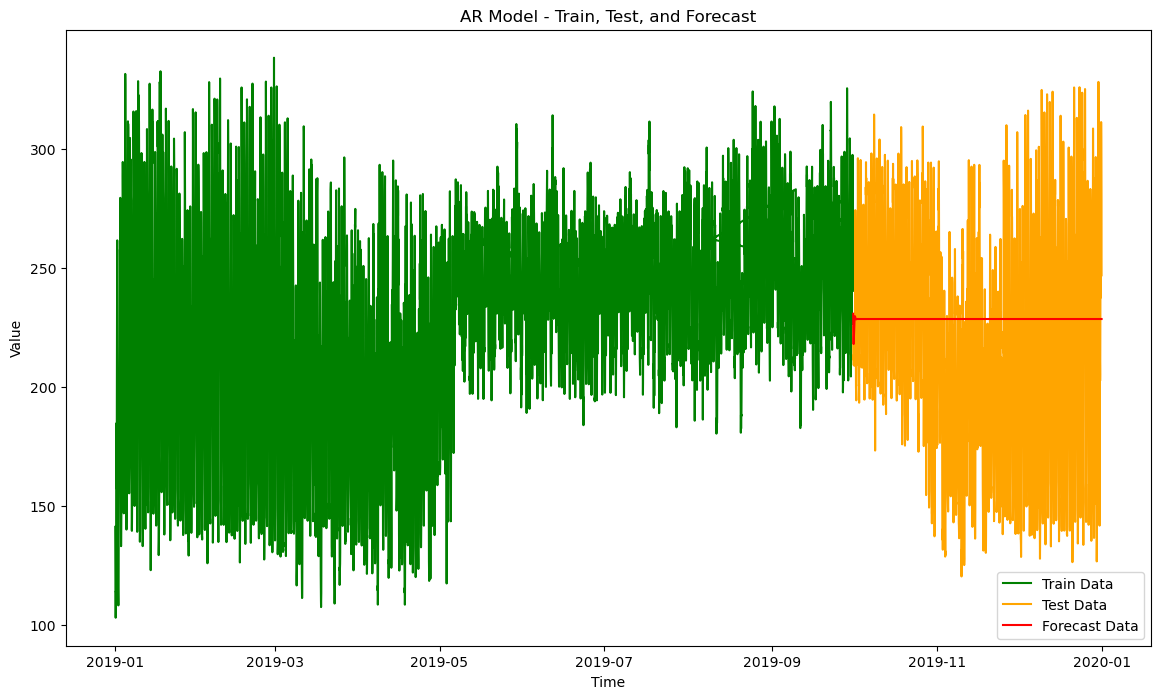

Accuracy :  76.27697569655702


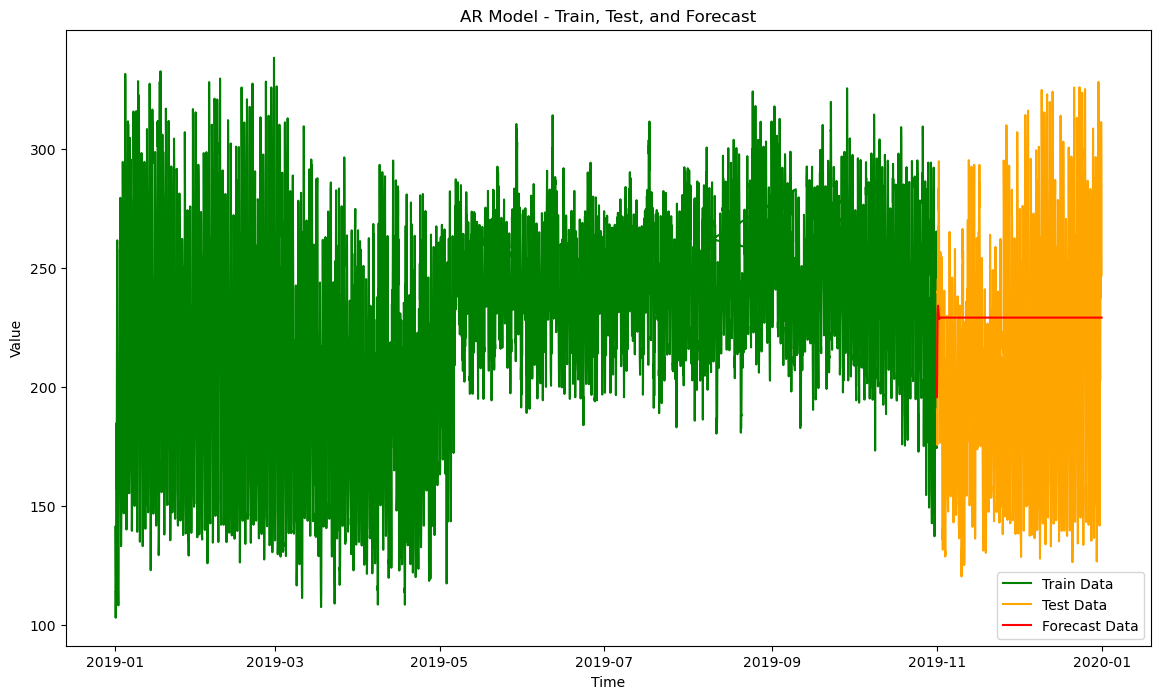

Accuracy :  76.4544825929743


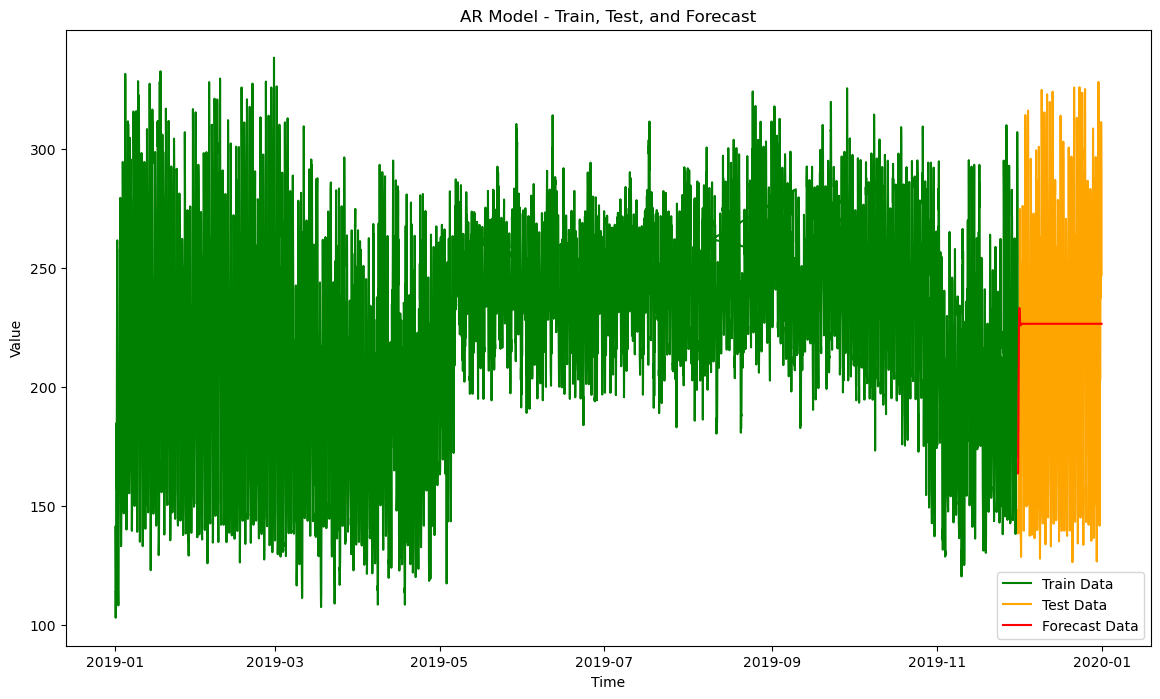

In [6]:
AR_Modeling('input_data2019.csv', 'I1', 6546, 'Train, Test, and Forecasted Data with AR Model (9/12 train)')
AR_Modeling('input_data2019.csv', 'I1', 7290, 'Train, Test, and Forecasted Data with AR Model (10/12 train)')
AR_Modeling('input_data2019.csv', 'I1', 8010, 'Train, Test, and Forecasted Data with AR Model (11/12 train)')

<a id='ar2'> </a>
## Modeling with AR After Augmenting
###  All periods of train/test for the first phase

Accuracy :  81.92183117512258


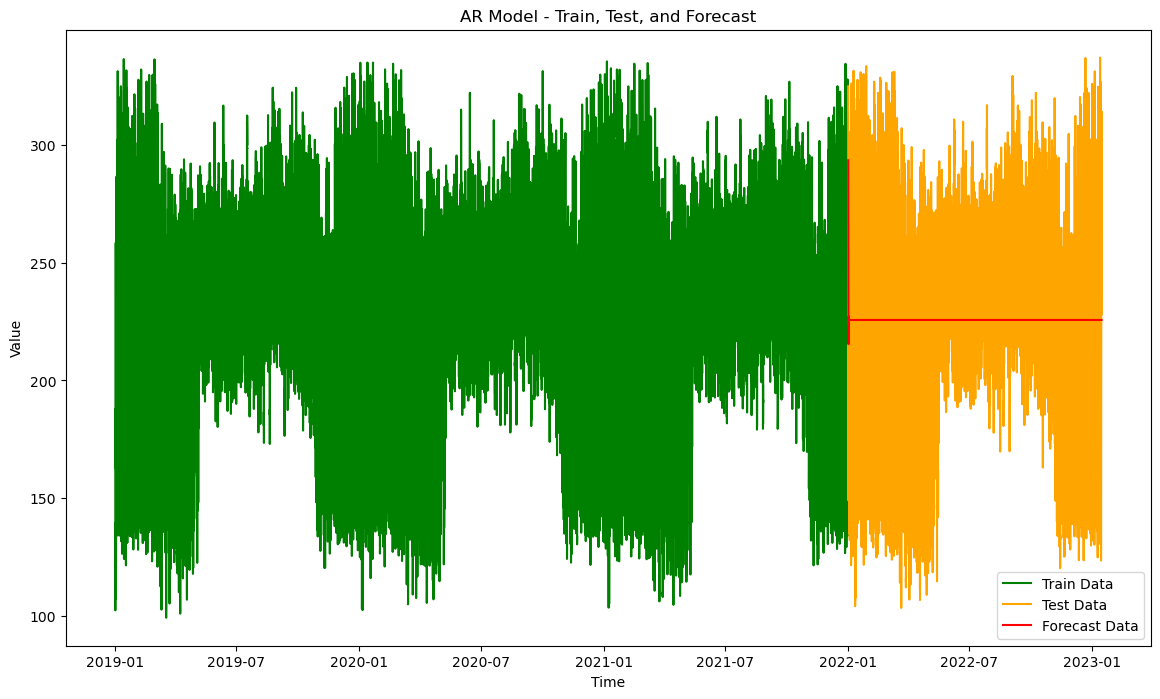

Accuracy :  84.97103993495085


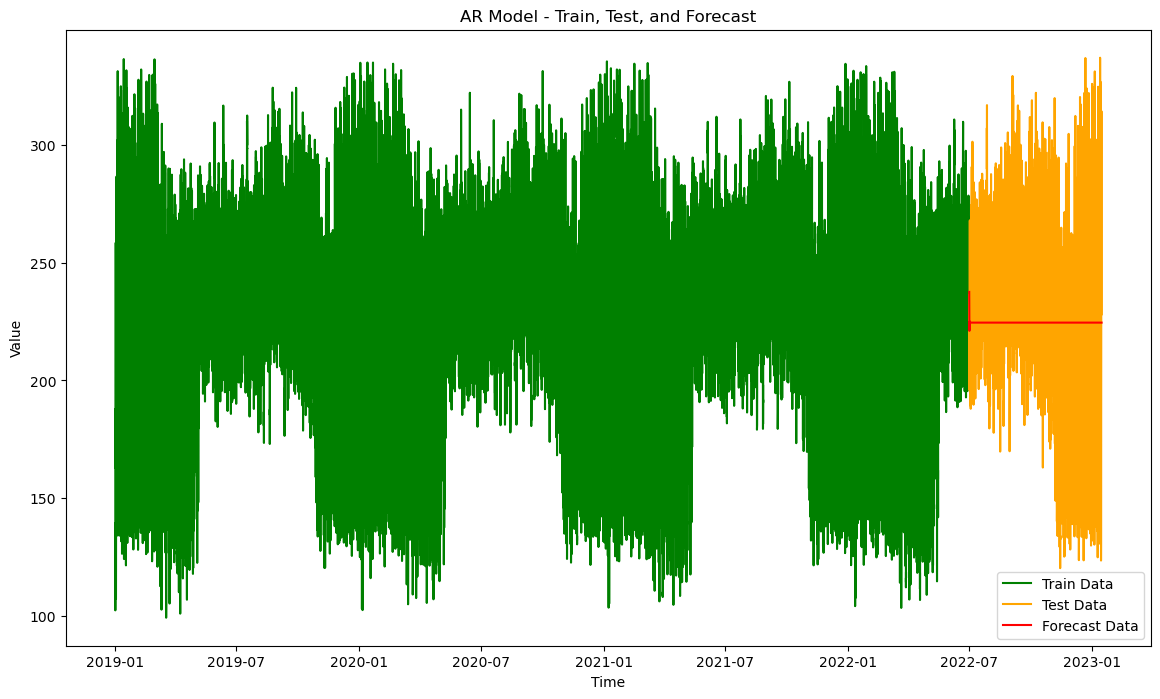

Accuracy :  81.18163545840665


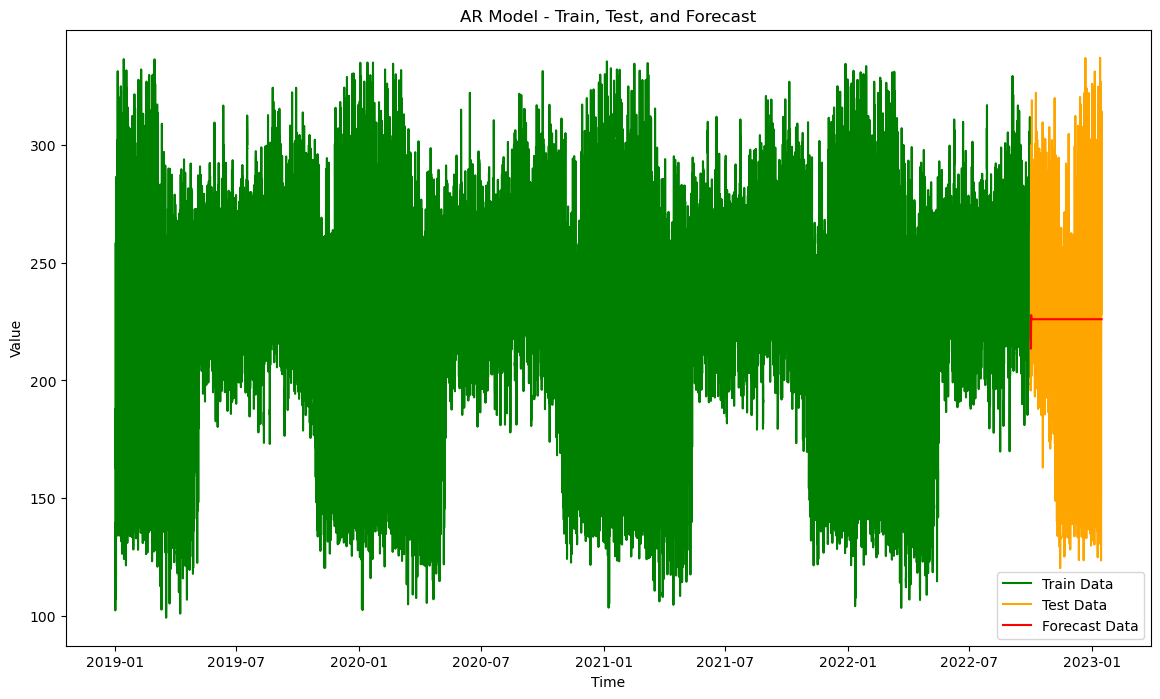

In [7]:
AR_Modeling('input_data2019-augmented.csv', 'I1', 26305, 'Train, Test, and Forecasted Data with AR Model (36/48 train)')
AR_Modeling('input_data2019-augmented.csv', 'I1', 30649, 'Train, Test, and Forecasted Data with AR Model (42/48 train)')
AR_Modeling('input_data2019-augmented.csv', 'I1', 32857, 'Train, Test, and Forecasted Data with AR Model (45/48 train)')